# DS 3000 HW 3

Due: Tuesday Oct 31 @ 11:59 PM EST

### Submission Instructions
You will may submit up to two files for this assignment. This `ipynb` file should have answers to the programming questions, and you could include the answers to the math problems as well either via LaTeX typesetting in Markdown cells, or by embedding images of your written work. If you would rather work on the math problems separately, you may also submit a pdf file with your handwritten answers to the math problems. To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to Gradescope.

### Tips for success
- Start early
- Make use of Piazza (also accessible through Canvas)
- Make use of Office Hours
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (*not* show each other your answers to) the problems.

# Part 1: Data Cleaning and Ethics

The first part of this HW deals with the Get to Know You results from my DS3000 sections this semester. Please download the `cleaner_gtky.csv` file for use on this homework if you haven't already.

## Pseudonymizing data

It's often the case that we 'Pseudonymize' (use random fake pseudonyms instead of personally identifiable information) a dataset by storing a code which maps some sensitive information to a consistent tag.

| fake_student_id | time_stamp                 | class     | co_op | dream_career                                   | hobby                                      | song                                                                        | ai_feels                                                      | age_months | pets | credit_hours | work_hours |
|-----------------|----------------------------|-----------|-------|------------------------------------------------|--------------------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------|------------|------|--------------|------------|
| 1841            | 2023/09/06 12:59:46 AM AST | Junior    | No    | Pharmaceutical data scientist job              | playing poker, try new restaurants         |                                                                             | I think it's the future, and the future looks great!          | 240        | 0    | 18           | 30         |
| 1049            | 2023/09/06 5:52:01 AM AST  | Senior    | Yes   | Management                                     | Drawing                                    | https://www.youtube.com/watch?v=A1EhBdsTkl8                                 | I think it's the future, and the future looks great!          | 259        | 8    | 16           | 0          |
| 1508            | 2023/09/06 8:40:59 AM AST  | Sophomore | No    | I want to be a UI/UX developer.                | I love doing yoga and going on long walks! | "I'll Be There For You"                                                     | It will be useful, but it won't change the world signicantly. | 230        | 0    | 19           | 15         |
| 1717            | 2023/09/06 9:07:26 AM AST  | Junior    | Yes   | International Affairs                          | Singing                                    | These are the Days by Inhaler - https://www.youtube.com/watch?v=l0Hilyfp_8A | I'm a bit worried it might be used for ill.                   | 246        | 5    | 17           | 0           |

To protect student privacy, this data has already been pseudonymized by creatfake_student_iddent ID` column with random numbers.

Note that there is a difference between:
- **pseudonymization** (changing everyone's name to a pseudonym)
- **anonymization**  (ensuring no individual can be uniquely identified within the data)

Briefly, if a single student was known to be the only one who submitted their Get to Know You at 15:37, then changing their name to a pseudonym is insufficient to protect their privacy within this data.  [This link](https://gathercapture.com/latest/anonymous-pseudonymous-data-are-they-important) contains further details, though its not necessary for this HW.

### Generating a pseudonym

[Universally Unique Identifiers](https://en.wikipedia.org/wiki/Universally_unique_identifier) is a CS term for a unique name:

In [1]:
from uuid import uuid4

# a good random pseudonym/alias
str(uuid4())

'48724630-ae1d-4891-a243-76ed203a79c3'

In [2]:
# a good enough random alias for us (doesn't need to be as long to be unique)
str(uuid4())[:6]

'0fdc65'

You can read more about the process in the [python docs for uuid4()](https://docs.python.org/3/library/uuid.html#uuid.uuid4) but its sufficient to know that there are so many unique output strings of `uuid4()` that we can assume no two calls return the same id.

## Part 1.1: Pseudonymize (10 points)

Pseudonymize `df_gtky` (since I already did it once, pretend that the current 'fake_student_id' is actually real) by completing the tasks below:

1. Load `cleaner_gtky.csv` to a DataFrame called `df_gtky`
1. Write a `pseudonymize_col()` function which:
    * accepts a DataFrame and the name of one of its columns
    * returns `pseudo_map_dict`
        - keys are the unique items observed in original column of dataframe
        - values are the new pseudonyms
    * operates `inplace` by modifying the input DataFrame to replacing each item in the given column with its corresponding pseudonym
    
Note that the pseudonymization must be consistent: all observations of a particular student ID in the original DataFrame are replaced with an identical pseudonym.

1. call `pseudonymize_col()`, and print out the `.head()` of the resulting `df_gtky` to demonstrate it worked. 

[This example](https://colab.research.google.com/drive/1VdikAnXZEBx3tGxclDG-BC-psr_D_DBN?usp=sharing) may help clarify the expected behavior of `pseudonymize_col()`.

In [3]:
import pandas as pd 

df_gtky = pd.read_csv('cleaner_gtky.csv')

# Find rows with duplicate id's
# rep = df_gtky[df_gtky.duplicated(['fake_student_id'], keep=False)].fake_student_id
# rep

In [4]:
import numpy as np

np.random.seed(21)

def pseudonymize_col(df, col_name):
    """ Pseudonymize col of df by  using subtring of uuid4()
        Args: dataframe (df) and column name (col_name -- string)
        Returns: dict representing map of pseudonymization where 
                 unique_value (from given col) -> pseudonym
        Populate dict by creating corresponding pseudonym from each unique col item, 
        and pass this dict to replace fn that replaces all col values with pseudonyms
    """
    pseudo_map_dict = {col_name: {}}
    for item in df[col_name].unique():
        pseudo_map_dict[col_name] = {item: str(uuid4())[:6]}
        df.replace(pseudo_map_dict, inplace=True)
        
    return pseudo_map_dict

pseudonymize_col(df_gtky, 'fake_student_id')
df_gtky.head(4)

fake_student_id                  time_stamp      class co_op  \
0          da7142  2023/09/06 12:59:46 AM AST     Junior    No   
1          3f10bb   2023/09/06 5:52:01 AM AST     Senior   Yes   
2          416216   2023/09/06 8:40:59 AM AST  Sophomore    No   
3          a6afac   2023/09/06 9:07:26 AM AST     Junior   Yes   

                        dream_career  \
0  Pharmaceutical data scientist job   
1                        Management    
2    I want to be a UI/UX developer.   
3              International Affairs   

                                        hobby  \
0          playing poker, try new restaurants   
1                                     Drawing   
2  I love doing yoga and going on long walks!   
3                                     Singing   

                                                song  \
0                                                NaN   
1        https://www.youtube.com/watch?v=A1EhBdsTkl8   
2                            "I'll Be There For You"   
3  These are the Days by Inhaler - https://www.yo...   

                                            ai_feels  age_months  pets  \
0  I think it's the future, and the future looks ...       240.0   0.0   
1  I think it's the future, and the future looks ...       259.0   8.0   
2  It will be useful, but it won't change the wor...       230.0   0.0   
3        I'm a bit worried it might be used for ill.       246.0   5.0   

   credit_hours  work_hours  
0            18        30.0  
1            16         0.0  
2            19        15.0  
3            17         0.0

## Part 1.2: Cleaning (5 points)

As we've discussed in class, there are few messy things about these data. For example:

- I am in the data, and I am not a student.
- A few students entered their age in months incorrectly.
- There are several missing values.

Clean the data set by making decisions about what to do with the incorrect and missing data and then justify your decisions in a markdown cell. Your final data set should:

- Contain no obviously incorrect data
- Contain a *minimal amount of missing data
  - *what you define as minimal may be different from other students. You **must** justify your cleaning choices adequately to receive full points on this part
  - Note this means you may still have some missing data, but you may want to remove some missing observations and/or impute others. Treat all missing data as missing at random.
  - Assume we care more about the numeric features than the categorical features.
 
When you are done, you should save the clean data set as a different object (such as `df_gtky_clean`) and demonstrate the changes. This could be done in any of several ways, including but not limited to displaying subsets of the original and cleaned data set and/or creating plot(s) or numerical summaries which demonstrate the changes.

In [5]:
df_gtky.shape

(190, 12)

In [6]:
df_gtky.head()

fake_student_id                  time_stamp      class co_op  \
0          da7142  2023/09/06 12:59:46 AM AST     Junior    No   
1          3f10bb   2023/09/06 5:52:01 AM AST     Senior   Yes   
2          416216   2023/09/06 8:40:59 AM AST  Sophomore    No   
3          a6afac   2023/09/06 9:07:26 AM AST     Junior   Yes   
4          43fa78  2023/09/06 10:04:32 AM AST  Sophomore    No   

                                     dream_career  \
0               Pharmaceutical data scientist job   
1                                     Management    
2                 I want to be a UI/UX developer.   
3                           International Affairs   
4  research in data science & neuroscience fields   

                                        hobby  \
0          playing poker, try new restaurants   
1                                     Drawing   
2  I love doing yoga and going on long walks!   
3                                     Singing   
4               travelling, reading, painting   

                                                song  \
0                                                NaN   
1        https://www.youtube.com/watch?v=A1EhBdsTkl8   
2                            "I'll Be There For You"   
3  These are the Days by Inhaler - https://www.yo...   
4                                                NaN   

                                            ai_feels  age_months  pets  \
0  I think it's the future, and the future looks ...       240.0   0.0   
1  I think it's the future, and the future looks ...       259.0   8.0   
2  It will be useful, but it won't change the wor...       230.0   0.0   
3        I'm a bit worried it might be used for ill.       246.0   5.0   
4        I'm a bit worried it might be used for ill.       230.0   6.0   

   credit_hours  work_hours  
0            18        30.0  
1            16         0.0  
2            19        15.0  
3            17         0.0  
4            17         0.0

In [7]:
# Remove rows if their corresponding age is greater than 25 years or smaller than 15 years
max_age = 25 * 12
min_age = 15 * 12
clean_df = df_gtky.copy()

# Drop nan's for numerical columns
num_cols = ['age_months', 'pets', 'credit_hours', 'work_hours']
clean_df = clean_df.dropna(subset=num_cols)

# Cast from strings to floats
clean_df[num_cols] = clean_df[num_cols].astype(float)

# Get rid of aforementioned rows using boolean indexing
age_bool = (clean_df.age_months > max_age) | (clean_df.age_months < min_age)
clean_df = clean_df[~age_bool]

In [8]:
import plotly.express as px

print('Age (in months) of student body before data cleaning')
fig = px.scatter(df_gtky, x='fake_student_id', y='age_months')
fig.show()

Age (in months) of student body before data cleaning


In [9]:
print('Age (in months) of student body after data cleaning')
fig = px.scatter(clean_df, x='fake_student_id', y='age_months')
fig.show()

Age (in months) of student body after data cleaning


In [10]:
df_gtky.shape

(190, 12)

In [11]:
rows_with_nans = df_gtky[df_gtky[num_cols].isna().any(axis=1)]
print(f"There are {len(rows_with_nans)} rows with nan's in a numerical col.")

There are 3 rows with nan's in a numerical col.


I've decided to clean the data by first getting rid of rows that contain nan's in any of the numerical columns. I didn't do any interpolation or filled the missing values with something like the averages of the other values because the total number of deleted rows was 3. These rows accounted for roughly 2% of our data which I thought was insignificant. I then casted the numerical cols' types to the 'float' type because these were originally strings which are not ideal to work with considering these are numbers. I then removed rows of data for users I thought were 'non-students' based on the 'age_months' column. There were 4 such rows. My rule was that a user is considered a student if 15 < age_months/12 < 25. I thought this was reasonable given DS3000 is an undergraduate class typically taken by 17-21 year olds, but there could be the chance a really bright student who's younger is taking the class, or someone older that took gap years before enrolling in college. Lastly, I looked at the scatter plot of students vs. each numerical col for pets, credit_hours, and work_hours but decided to not remove any rows since there weren't any outrageous outliers. 

## Part 1.3: Ethics Considerations (5 points)

Write a paragraph in the markdown cell below discussing why we should be pseudonymizing these data and why we needed to clean it. Your answer must be well thought out, **at least two sentences**, and provide insight specific to the data collected to receive full credit.

We pseudonymized this dataset to give the students that filled out the survey some privacy. Since I don't have information about the times each student submitted their survey, I have no way of uniquely identifying them by using these times. Moreover, I focused on cleaning the columns corresponding to numerical values since this dataset is supposed to represent the student body of the DS3000 class, meaning that data points corresponding to "non-students" should be removed. One key column that helps us do this is the "age_months" column.
In general, data cleaning is a crucial step of any DS project. If you want to learn something about your data, you can't have incomplete data or data with values that don't make sense in the context of whatever you're studying.

## Part 1.4: Ethics More Generally (5 points)

Notice that one of the decisions we made was to save `pseudo_map_dict` to ensure the pseudonymization can be undone. This is often done in medical studies when pseudonymizing data. Why would we want to do this? **Discuss in a couple sentences**.

We'd want to undo the pseudonymization after conducting medical studies of patients to put our findings in use for the patients. In order to help each individual patient, we'd have to know their original ID to identify them. Conducting the study in this way guarantees that you reveal the identity of each patient only when you absolutely need to. We don't need to know the patient's identities when creating plots, running models with the data, etc.

# Part 2: Summarizing and Visualizing Data

For this part, you will use the `players_fifa23.csv` from Canvas to investigate the ratings for soccer players in the FIFA 23 video game. Make sure the `.csv` is in the same directory as this notebook file.

**Note**: You do not need to know anything about soccer or video games to complete this problem, only perhaps that a higher `Overall` rating is considered a good thing.

## Part 2.1: Plotting Data (15 points)

Create a plotly scatter plot which shows the mean `Overall` rating for soccer players (rows) of a given `Nationality` for a particular `Age`. Focuse on three countries (`England`, `Germany`, `Spain`). In other words, your plot's x-axis should be `Age`, the y-axis should be `Overall`, and there should be three different colored points at each `Age`, one for each `Nationality`.

Export your graph as an html file `age_ratings_nationality.html`. You do not have to submit it with this homework, but the code should show that you did this.

Hints:
- There may be multiple ways/approaches to accomplish this task.
- One approach: you may use `groupby()` and boolean indexing to build these values in a loop which runs per each `Nationality`.
- `px.scatter()` will only graph data from columns (not the index).  Some approaches may need to graph data from the index.  You can use [df.reset_index()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) to make your index a new column as shown [in this example](https://colab.research.google.com/drive/1d9JDphmpSTg9NtFMyfFnMQ6RmIx6zChK?usp=sharing)
- In some approaches you may need to pass multiple rows to [df.append()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) if need be as shown [in this example](https://colab.research.google.com/drive/1XbBHMcYq_2Q225nkKs3j06iigCQGmM4H?usp=sharing)
- In some approaches you may need to go from "wide" data to "long" data by using [df.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) as discussed [here](https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad)
- The first few code cells below get you started with looking at the data set.

In [13]:
# use pandas to read in the data
import pandas as pd

df_fifa = pd.read_csv('players_fifa23.csv', index_col = 'ID')
df_fifa.head()

Name            FullName  Age  Height  Weight  \
ID                                                                
165153      K. Benzema       Karim Benzema   34     185      81   
158023        L. Messi        Lionel Messi   35     169      67   
231747       K. Mbappé       Kylian Mbappé   23     182      73   
192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
188545  R. Lewandowski  Robert Lewandowski   33     185      81   

                                                PhotoUrl Nationality  Overall  \
ID                                                                              
165153  https://cdn.sofifa.net/players/165/153/23_60.png      France       91   
158023  https://cdn.sofifa.net/players/158/023/23_60.png   Argentina       91   
231747  https://cdn.sofifa.net/players/231/747/23_60.png      France       91   
192985  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium       91   
188545  https://cdn.sofifa.net/players/188/545/23_60.png      Poland       91   

        Potential  Growth  ...  LMRating  CMRating RMRating LWBRating  \
ID                         ...                                          
165153         91       0  ...        89        84       89        67   
158023         91       0  ...        91        88       91        67   
231747         95       4  ...        92        84       92        70   
192985         91       0  ...        91        91       91        82   
188545         91       0  ...        86        83       86        67   

       CDMRating  RWBRating  LBRating  CBRating  RBRating  GKRating  
ID                                                                   
165153        67         67        63        58        63        21  
158023        66         67        62        53        62        22  
231747        66         70        66        57        66        21  
192985        82         82        78        72        78        24  
188545        69         67        64        63        64        22  

[5 rows x 89 columns]

In [14]:
df_fifa.Nationality.value_counts()

Nationality
England        1652
Germany        1209
Spain          1054
France          936
Argentina       930
               ... 
Saint Lucia       1
Kazakhstan        1
Vietnam           1
Niger             1
Singapore         1
Name: count, Length: 161, dtype: int64

In [15]:
df_fifa.shape

(18360, 89)

In [16]:
df_fifa['Age'].unique()

array([34, 35, 23, 31, 33, 30, 36, 37, 28, 29, 27, 25, 32, 21, 26, 24, 19,
       22, 40, 20, 39, 38, 44, 17, 41, 18, 42, 43, 16], dtype=int64)

In [17]:
nat_boolean = df_fifa.Nationality.isin(['England', 'Germany', 'Spain'])
top_nat_fifa = df_fifa[nat_boolean]
top_nat_fifa.head()

Name               FullName  Age  Height  Weight  \
ID                                                                  
167495       M. Neuer           Manuel Neuer   36     193      93   
202126        H. Kane             Harry Kane   28     188      89   
212622     J. Kimmich         Joshua Kimmich   27     177      75   
182521       T. Kroos             Toni Kroos   32     183      76   
192448  M. ter Stegen  Marc-André ter Stegen   30     187      85   

                                                PhotoUrl Nationality  Overall  \
ID                                                                              
167495  https://cdn.sofifa.net/players/167/495/23_60.png     Germany       90   
202126  https://cdn.sofifa.net/players/202/126/23_60.png     England       89   
212622  https://cdn.sofifa.net/players/212/622/23_60.png     Germany       89   
182521  https://cdn.sofifa.net/players/182/521/23_60.png     Germany       88   
192448  https://cdn.sofifa.net/players/192/448/23_60.png     Germany       88   

        Potential  Growth  ...  LMRating  CMRating RMRating LWBRating  \
ID                         ...                                          
167495         90       0  ...        47        53       47        39   
202126         89       0  ...        86        84       86        69   
212622         90       1  ...        86        89       86        87   
182521         88       0  ...        84        88       84        80   
192448         89       1  ...        42        48       42        36   

       CDMRating  RWBRating  LBRating  CBRating  RBRating  GKRating  
ID                                                                   
167495        46         39        38        37        38        90  
202126        71         69        66        64        66        23  
212622        89         87        86        84        86        24  
182521        84         80        77        74        77        22  
192448        44         36        34        36        34        89  

[5 rows x 89 columns]

In [18]:
grouped_df = top_nat_fifa.groupby(['Nationality', 'Age'])['Overall'].mean().reset_index()
grouped_df

Nationality  Age    Overall
0      England   17  53.941176
1      England   18  54.875000
2      England   19  57.852459
3      England   20  59.562044
4      England   21  62.666667
..         ...  ...        ...
67       Spain   37  70.600000
68       Spain   38  70.000000
69       Spain   39  77.000000
70       Spain   40  78.666667
71       Spain   41  73.000000

[72 rows x 3 columns]

In [19]:
# making the plot
import plotly.express as px

fig = px.scatter(grouped_df, x='Age', y='Overall', color='Nationality')
fig.update_traces(marker=dict(size=8))
fig.update_layout(
    title='Age vs. Overall Rating by Nationality', 
    xaxis_title='Age', 
    yaxis_title='Overall Rating',
    legend_title='Nationality',
    title_x=0.5, 
    title_y=0.95
)
fig.add_shape(
    type='line',
    x0=min(grouped_df['Age']),
    x1=max(grouped_df['Age']),
    y0=65.833,
    y1=65.833,
    line=dict(color='black', width=1.5) 
)
fig.show()

# Save plot as html
fig.write_html("age_ratings_nationality.html")

## Part 2.2: Numerical Summaries (10 points)

1. Calculate the sample mean and median of `Overall` for the entire data set. In a markdown cell, discuss what their relative values imply about the distribution of `Overall`, and then use the plot from 2.1 and these values to discuss whether you think English, German, and Spanish players are generally better rated than other country's players, and at what age do they become average players?
2. Calculate the `.group_by()` function to calculate the means and standard deviations of `Overall` for the three Nationalities in Part 2.1 (you will want to use the original data frame or a slightly modified version of it (the `.isin` function from pandas may help), **NOT** the data frame you used for the plot). What do these values tell you about the differences between English, German, and Spanish players?
3. Create a subset of the original data frame that includes only `Age`, `Height`, `Weight`, and `Overall`. Calculate the correlation matrix for these four features and discuss what the relationships seem to be and whether those relationships make sense to you.

In [20]:
mean_median = f"Sample mean: {df_fifa.Overall.mean():.3f}, sample median: {df_fifa.Overall.median():.3f}"
mean_median

'Sample mean: 65.833, sample median: 66.000'

The close similarity between the Overall's sample mean (65.833) and sample median (66) suggests a distribution that is nearly symmetric or mildly left-skewed, with a relatively small difference between them, indicating the absence of extreme outliers.
Now looking back at the scatter plot, we see that players from Spain, Germany, and England are generally better rated than other country's players, since starting at age 25 pretty much all players from these 3 countries are rated above the sample mean/median.

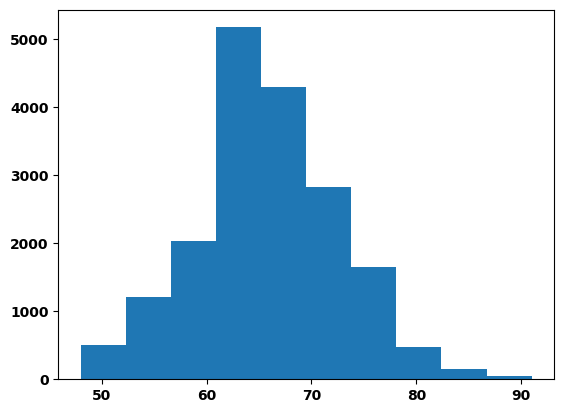

In [21]:
import matplotlib.pyplot as plt

plt.hist(df_fifa.Overall)
plt.show()

In [22]:
print(top_nat_fifa.groupby('Nationality')['Overall'].mean())
top_nat_fifa.groupby('Nationality')['Overall'].std()

Nationality
England    63.865617
Germany    65.635236
Spain      69.163188
Name: Overall, dtype: float64


Nationality
England    6.929085
Germany    6.369691
Spain      6.310269
Name: Overall, dtype: float64

By looking at the means, we can say players from Spain are generally higher rated than German players, which are generally higher rated than English players (means are in descending order). Moreover, we see Spanish players have the smallest std. deviation out of the 3 nations, further indicating they're generally better rated than the other 2 countries. The reason being that the overall ratings for Spanish players is closer to the sample mean since std. deviation is smaller.

In [23]:
subset_df = df_fifa[['Age', 'Height', 'Weight', 'Overall']]
subset_df.corr(numeric_only=True)

Age    Height    Weight   Overall
Age      1.000000  0.064194  0.212254  0.442932
Height   0.064194  1.000000  0.756610  0.031366
Weight   0.212254  0.756610  1.000000  0.124180
Overall  0.442932  0.031366  0.124180  1.000000

The first thing I noticed is how age and height are not correlated at all (coef. = 0.064) which I think makes sense since most professional players have already reached their maximum height when playing professionally. Age and weight are only slightly positively correlated (0.212) which could be argued to make sense since players tend to gain weight as they get older but not by much since these are all athletes. The most interesting relationship can be seem between age and overall rate, with a positive correlation score of 0.443. We see age is the most important factor when trying to estimate the overall score of a player. This also makes sense since players tend to get better as they get more experience, i.e., as they get older.
The strongest (positive) correlation coef. for this matrix (0.757) belongs to the relationship between height and weight which should be obvious since taller people are (almost) always heavier than shorter people.

# Part 3: Vector Geometry Practice (10 points)

Use the vectors to below to compute the following quantities. You must show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed the image in this .ipynb file, or submit a separate pdf file with your handwritten work. Round all decimals to three places.

After calculating the quantities by hand, use numpy in cells below to verify your answers.

$a = \begin{bmatrix} 2 \\ -1 \\ 3 \end{bmatrix}$

$b = \begin{bmatrix} -4 \\ -2 \\ 0 \end{bmatrix}$

$c = \begin{bmatrix} 3 \\ 3 \\ -3 \end{bmatrix}$

1. Compute $||b+c||$
2. Compute $2a + b$
3. Compute $c \cdot a$
4. Compute $||\frac{a}{2} - c||$
5. Compute $b \cdot (a + c)$

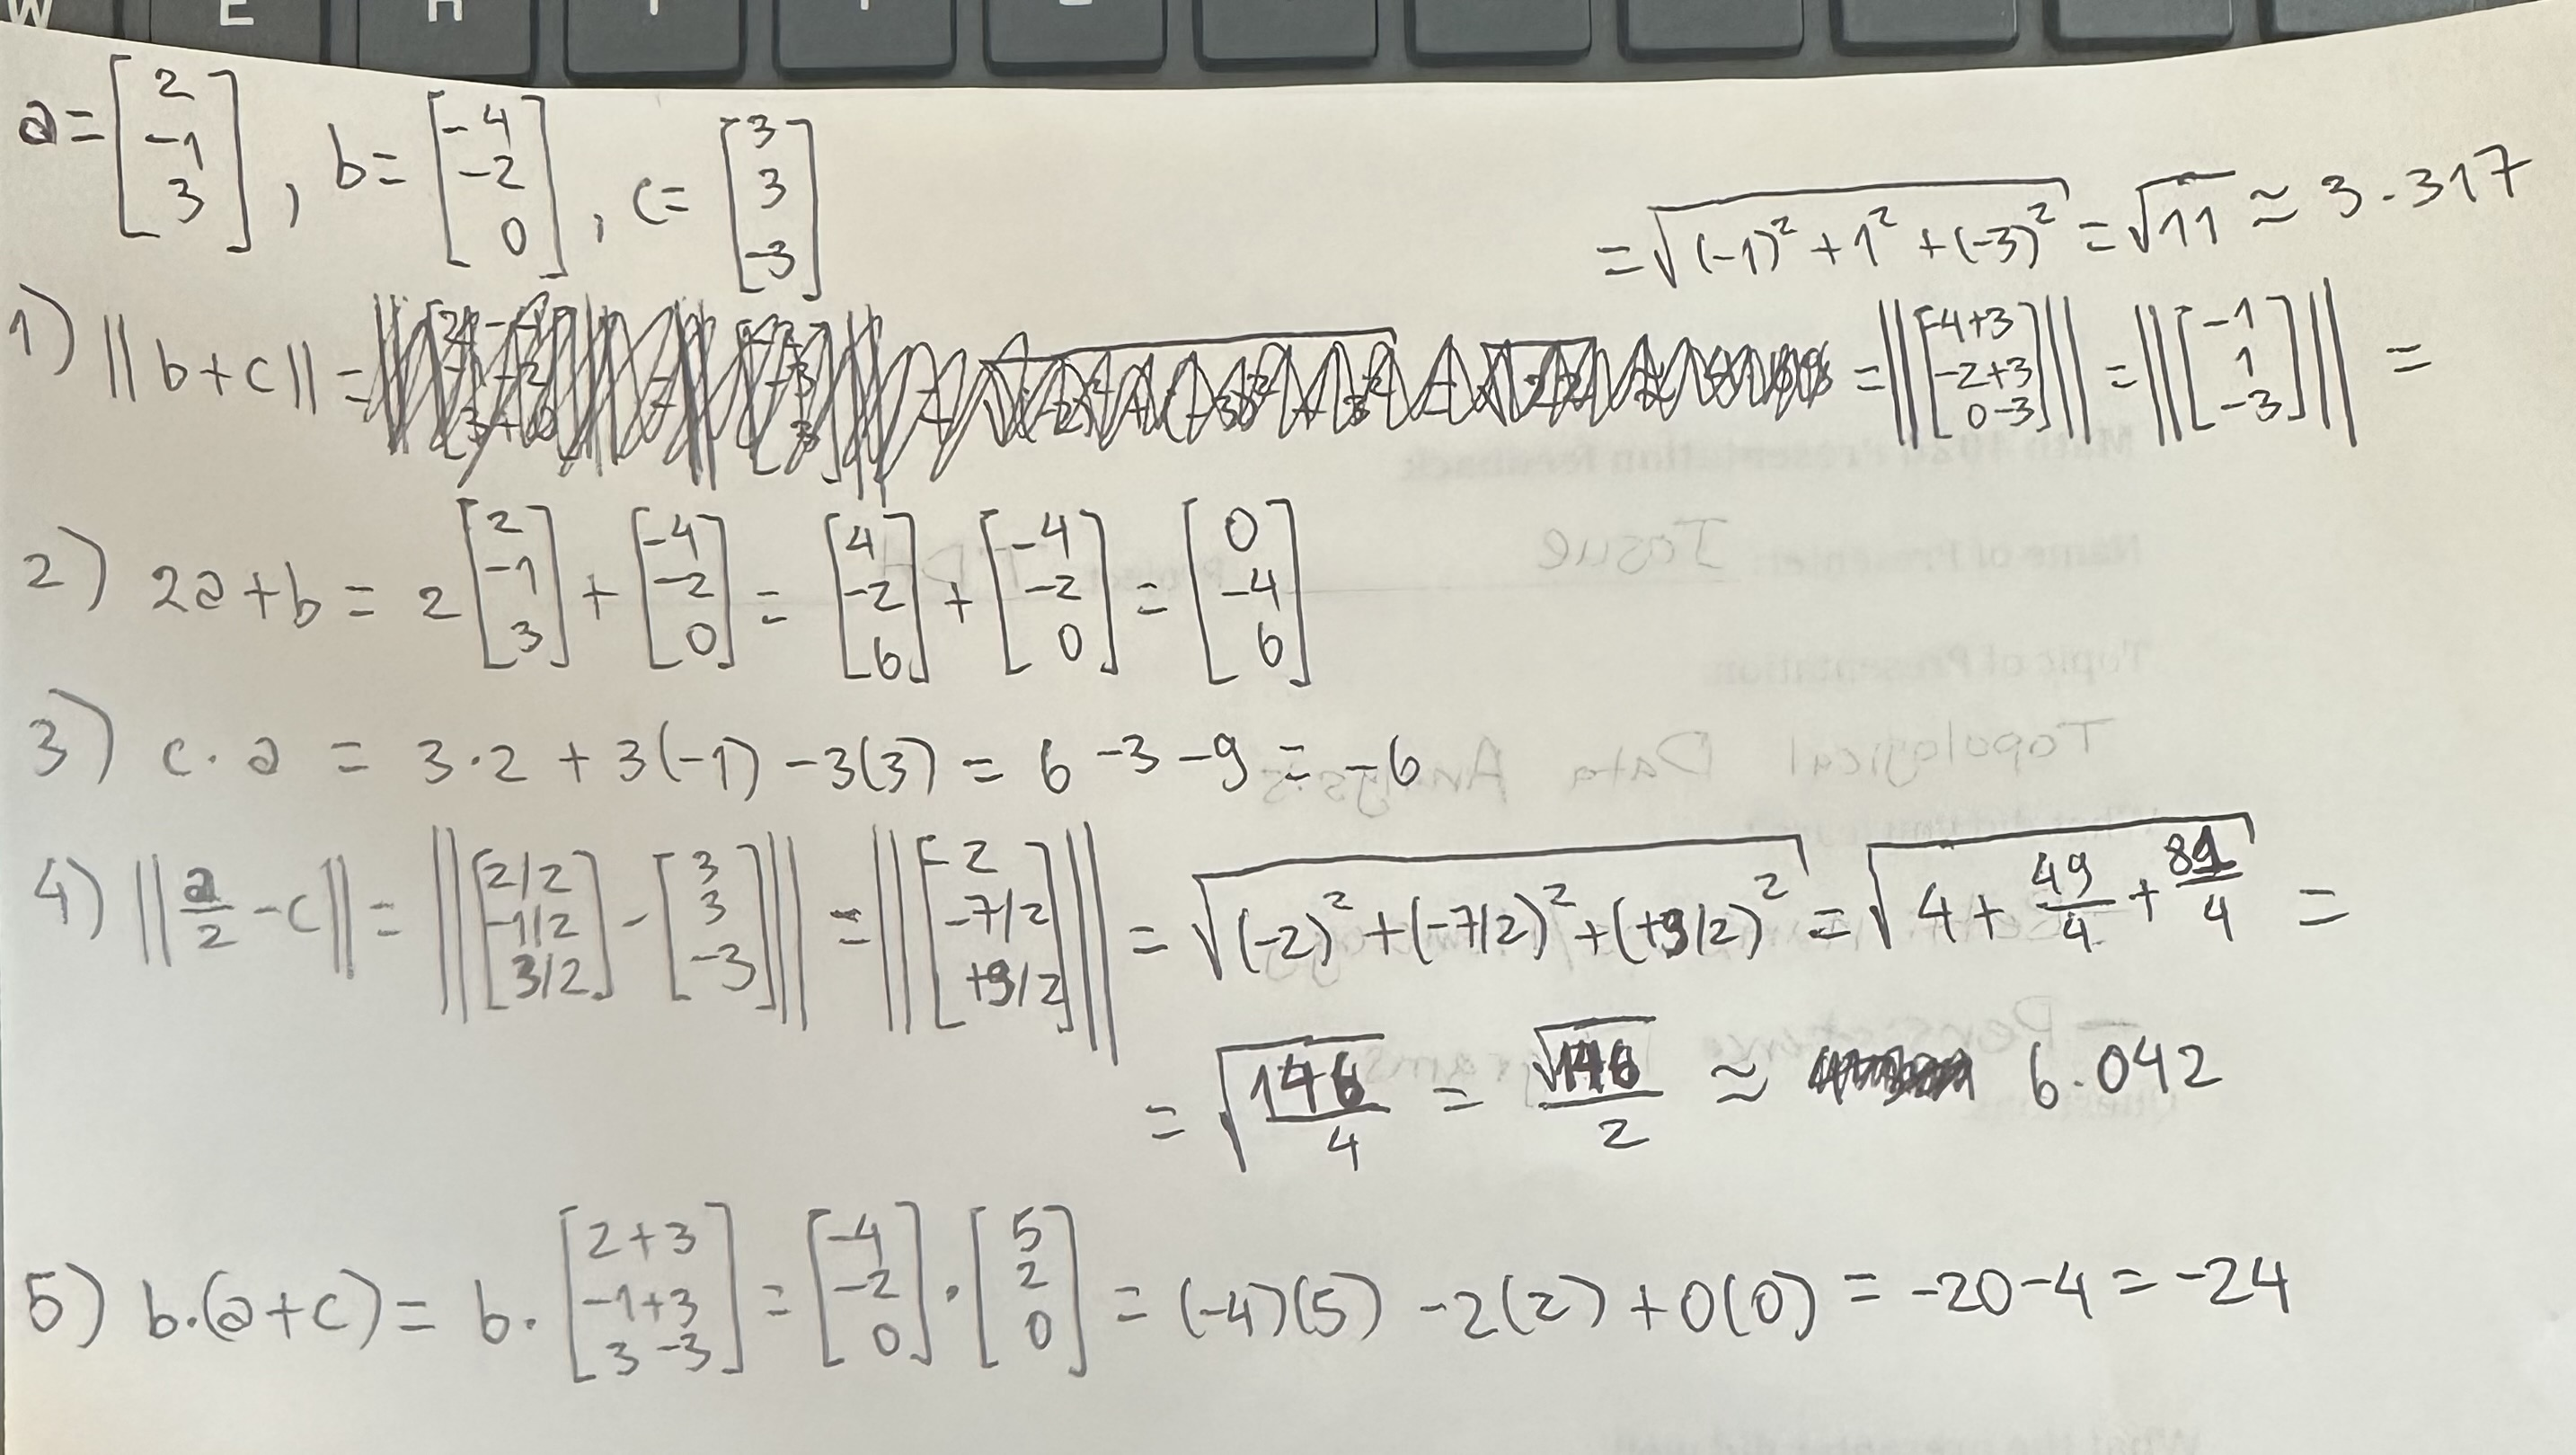

In [24]:
import numpy as np

a = np.array([2, -1, 3])
b = np.array([-4, -2, 0])
c = np.array([3, 3, -3])

In [25]:
v = b + c
print(v)
mag = round(sum([i**2 for i in v]) ** (1/2), 3)
print(mag)

[-1  1 -3]
3.317


In [26]:
v = 2*a + b
print(v)

[ 0 -4  6]


In [27]:
v = c.dot(a)
print(v)

-6


In [28]:
v = a/2 - c
print(v)
mag = round(sum([i**2 for i in v]) ** (1/2), 3)
print(mag)

[-2.  -3.5  4.5]
6.042


In [29]:
v = b.dot(a + c)
print(v)

-24


# Part 4: Spotify Perceptron

In this part you will use a subset of our class' Spotify playlist to enact a linear perceptron algorithm in order to predict the `Mode` (Major or Minor) of a song based on its `danceability` and `energy`. I have created the subset and uploaded it to Canvas as the `simple_spot.csv` file. 

In [30]:
import pandas as pd

simple_spot = pd.read_csv('simple_spot.csv')
simple_spot.head()

bias  danceability  energy  mode
0     1         0.854   0.492     0
1     1         0.531   0.803     1
2     1         0.795   0.596     0
3     1         0.538   0.742     1
4     1         0.582   0.952     1

## Part 4.1: Visualize the Data (5 points)

Before beginning to implement the perceptron algorithm, make a plot using plotly of the two predictor features coloring the points by the mode (note that `Mode = 1` corresponds to Major Mode). Note that this is **not** a random subset, but rather a semi-curated collection of 60 songs from our class' playlist. In a markdown cell, discuss whether this linear perceptron will converge or not without defining a loss function and how you know.

In [31]:
import plotly.express as px

In [32]:
fig = px.scatter(simple_spot, x='danceability', y='energy', color='mode')
fig.show()

I can safely say the linear perceptron will converge based on the fact that this data is lineary separable, i.e., you can visually tell there exists a line that passes through the "division" between the yellow and blue points. I can see this line
will have a positive slope and intersect the y-axis on a negative value.

## Part 4.2: Do the First Iteration By Hand (10 points)

The first observation in the data set is, with added bias term: $x_1 = \begin{bmatrix} 1 \\ .854 \\ .492 \end{bmatrix}$. You will use this observation to perform the first update of your linear perceptron by hand. Initialize the weight vector to be $w = \begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}$, determine if an update of $w$ is necessary and, if so, update it. If not, continue looking at observations until you make your first update of $w$. **Do this first by hand** either writing out all your work with LaTeX in a Markdown cell, or with pencil and paper and then embedding the image below, or including it in pdf submitted with this .ipynb file. **Then**, use python to do exactly what you did by hand.

In [33]:
import numpy as np

$
\mathbf{w} = [0, 1, -1] \\
\mathbf{x}_1 = [1, 0.854, 0.492] \\
\mathbf{y} = [0] \\
\mathbf{w} \cdot \mathbf{x}_1 = w_1 x_1 + w_2 x_2 + w_3 x_3 = 0*1 + 1*0.854 -1*0.492 = 0.362 \\
$
Since $\mathbf{w} \cdot \mathbf{x}_1 = 0.362 > 0$, our current $\mathbf{w}$ predicts $\mathbf{x}_1$ has mode 1 which is incorrect.  
Hence, we update $\mathbf{w}$ as follows: $\mathbf{w} := \mathbf{w} - \mathbf{x}_1 = [-1, 0.146, -1.492] \\ $ 
Now: $\mathbf{w} \cdot \mathbf{x}_1 = -1*1 + 0.146*0.854 -1.492*0.492 = -1.609 < 0 \\ $
Hence, the updated $\mathbf{w}$ correctly predicts $\mathbf{x}_1$ has mode 0 and we're done.


In [34]:
w = np.array([0, 1, -1], dtype='float')
x_1 = np.array([1, 0.854, 0.492], dtype='float')
y = np.array([0])

if w.dot(x_1) >= 0:
    y_hat = 1
else:
    y_hat = 0

# End of first iteration
print("x_1 was predicted accurately: ", y_hat == y[0])

w -= x_1
if w.dot(x_1) >= 0:
    y_hat = 1
else:
    y_hat = 0

# End of second iteration
print("x_1 was predicted accurately: ", y_hat == y[0])


x_1 was predicted accurately:  False
x_1 was predicted accurately:  True


## Part 4.3: Write the Perceptron Function (10 points)

Write the function `linear_perceptron`, with appropriate docstring, which takes as arguments `X` (the array of X values, including the bias term), `y` (the array of response values), and `w` (the initial weight vector). These are already created for you below (to give you an idea of what they look like).

Your perceptron is a simple perceptron, which assumes the data are linearly separable and thus the only stopping criteria is that all the observations are correctly classified by the final weight vector. Your perceptron should iterate through all observations, updating $w$ sequentially (and keeping track of the total number of iterations), until all observations are iterated through and correctly classified. Include in your function the following two lines for when the algorithm has converged:

```python
print(f'Algorithm converged, final w = {w}')
print(f'Total number of iterations = {iter}')
```

Also make sure your function returns the final weight vector `w`. To test to make sure your function works, run the cell with the `assert` statement at the end of this part. When you run it, if function is written correctly and the `assert` passes, you should see:

```python
Algorithm converged, final w = [ 2.    -4.571  1.288]
Total number of iterations = 62
```

**Note**: My "Total number of iterations" does not include those times when $w$ is updated. If you did keep track of the iterations where $w$ is updated, the total number should be 240 (i.e. four complete loops through the data). If you see either of these numbers, the final $w$ looks correct, and the `assert` passes, then you are done.

In [35]:
import numpy as np

Xdat = np.array(simple_spot.iloc[:,:-1])
ydat = np.array(simple_spot.iloc[:,-1])
wdat = np.array([0, 1, -1], dtype='float')

In [36]:
def linear_perceptron(X, y, w = np.array([0, 1, -1], dtype='float')):
    y_hats = np.zeros(len(y))
    iteration = 0
    
    while np.any(y_hats != y):
        for i in range(len(X)):
            if X[i].dot(w) >= 0:
                y_hats[i] = 1
                if y_hats[i] != y[i]:
                    w -= X[i]
                    iteration += 1
            else:
                y_hats[i] = 0
                if y_hats[i] != y[i]:
                    w += X[i]
                    iteration += 1
            
    print(f'Algorithm converged, final w = {w}')
    print(f'Total number of iterations = {iteration}')
    
    return w
linear_perceptron(Xdat, ydat)

Algorithm converged, final w = [ 2.    -4.571  1.288]
Total number of iterations = 62


array([ 2.   , -4.571,  1.288])

In [37]:
myrun = linear_perceptron(Xdat, ydat, w = np.array([0, 1, -1], dtype='float'))

def predict_perceptron(x, w):
    yhat = 1 if np.dot(w, x) >= 0 else 0
    return yhat

assert (np.apply_along_axis(predict_perceptron, 1, Xdat, w=myrun) == ydat).all()

Algorithm converged, final w = [ 2.    -4.571  1.288]
Total number of iterations = 62


## Part 4.4: Cross Validate and Run (5 points)

To actually test the perceptron, we shouldn't run it on the full data set, but rather on a training set and then use a test set to evaluate the accuracy. Instead of Leave-One-Out Cross Validation (LOO-CV), we will instead use single-fold cross validation. The first cell below creates the training (`Xtrain` and `ytrain`) and test (`Xtest` and `ytest`) for this problem. 

Apply your function from 4.3 to the training data, and then use the `predict_perceptron` function I defined in 4.3 (as well as the Xtest and ytest values) to determine the cross validated accuracy of your function.

In [83]:
# may need to run pip install sklearn before doing below
from sklearn.model_selection import train_test_split

crossval = train_test_split(Xdat, 
                            ydat,
                            test_size=0.3)

Xtrain, Xtest, ytrain, ytest = crossval

In [84]:
wtrain = linear_perceptron(Xtrain, ytrain, w = np.array([0, 1, -1], dtype='float'))
wtrain

Algorithm converged, final w = [ 3.    -6.771  1.751]
Total number of iterations = 103


array([ 3.   , -6.771,  1.751])

In [85]:
y_hats = np.zeros(len(ytest))

for i in range(len(Xtest)):
    y_hats[i] = predict_perceptron(Xtest[i], wtrain)
print(y_hats)
print(ytest)
print(y_hats == ytest)

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]
[1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


## Part 4.5: Use `sklearn` and Compare (5 points)

Use the `Perceptron` function from `sklearn` to fit the training data, print the `.n_iter_` attribute after fitting and then use the `.score()` function to calculate the accuracy of the model fit to the test data. How many iterations did the scikit-learn function take to converge? Does the accuracy of `sklearn`'s perceptron function match yours? If so, do you expect this to always be the case? If not, why do you think this is?

You might take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) to help you answer these questions, though this is meant to be a relatively open-ended question without necessarily a specific answer.

In [47]:
from sklearn.linear_model import Perceptron

In [86]:
# Default value for tol since our data is linearly separable (no need to run all 1000 iterations)
sk_perceptron = Perceptron(shuffle=False)
sk_perceptron.fit(Xtrain, ytrain)

print("Number of iterations until convergence: ", sk_perceptron.n_iter_)
print(f"Model accuracy: {sk_perceptron.score(Xtest, ytest) *100}%")
print("Final w: ", sk_perceptron.coef_)

Number of iterations until convergence:  8
Model accuracy: 94.44444444444444%
Final w:  [[ 2.    -8.272  2.383]]


The scikit-learn function took 8 iterations to converge and it's 94.4% accurate which doesn't match the 100% accuracy of the function I wrote.
My perceptron will always have a 100% accuracy when trained on linearly separable data because this is an assumption of the function, and hence, it only stops updating the weight vectors once all data points are correctly classified. On the other hand, sklearn's perceptron doesn't assume this, and when the argument 'tol' is None, the stopping criteria is as follows: 
the iterations will stop when (current_loss > previous_loss - 1e-3) where loss is some cost/loss fn the model uses. That's why we see that it stopped running after only 8 iterations (94.4% accurate) as opposed to 103 iterations (100% accurate).

## Part 4.6: Thoughts on Extending the Model (5 points)

In the above problem, you worked with only a subset of the Spotify data set you created in Homework 2. What are some considerations/what would have to be different if you used the full data set (including other features besides danceability and energy) in a perceptron (or any other machine learning) algorithm to try to predict if a song is in Major or Minor mode? **Write a few sentences discussing this question.** As a reminder, here is what the top of the raw data set looks something like:

| danceability | energy | key | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | ... |
|--------------|--------|-----|----------|------|-------------|--------------|------------------|----------|---------|---------|-----|
| 0.631        | 0.605  | 0   | -8.73    | 1    | 0.0386      | 0.453        | 0.000184         | 0.291    | 0.25    | 115.281 | ... |
| 0.531        | 0.766  | 8   | -7.692   | 1    | 0.0582      | 0.0056       | 0                | 0.201    | 0.532   | 130.048 | ... |
| 0.561        | 0.965  | 7   | -3.673   | 0    | 0.0343      | 0.00383      | 7.07E-06         | 0.371    | 0.304   | 128.04  | ... |
| 0.62         | 0.712  | 9   | -6.434   | 1    | 0.1         | 0.228        | 3.39E-06         | 0.0561   | 0.83    | 170.234 | ... |     |


Had I used the full data set to write a linear perceptron function, the first thing I would have to change is the dimension of the initial w vector. When working with the subset of the data, w had 3 values (1 for bias and 1 for each variable); I'd have to change this to account for all the other variables and so w would have n values where n would be the total number of variables + 1 (bias term). After doing this, everything else from my algorithm would still work well since dot product of two vectors (no matter the dimension) always returns a number which we can use to predict the mode of a song. The only other thing I would consider is taking into account whether there's potential collinearity between the variables and if so, try to implement Ridge regularization to shrink some of the variables, effectively assigning more importance to some of the variables. On the other hand, if I was unsure the variables were correlated, I'd implement Lasson regularization to do feature selection, i.e., shrinking some less important variables to zero if they're not important when doing the predictions.